In [1]:
import json
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict

In [2]:
data = None
with open("data/adopt_your_spot.json", "r") as f:
    data = json.load(f)
data[0]

{'name': 'The drainage grates on both sides of Brevoort Pl and Franklin - close to 1 and 2 Brevoort Pl',
 'address': '2 Brevoort Place Brooklyn New York 11216',
 'description': {'@type': 'html',
  'value': "Submission Date: 2024-04-22 12:19:22<br>Street Address 2: 2 Brevoort Place<br>Street Address Line 2 2: <br>City 2: Brooklyn<br>State / Province 2: New York<br>Postal / Zip Code 2: 11216<br>Can you tell us why you have selected this spot?: It's the end of my block and is a big high-traffic area where trash always gets trapped from the wind. And I love making sure it's clean :)"},
 'styleUrl': '#icon-1592-0F9D58',
 'icon-opacity': 1,
 'icon-color': '#0f9d58',
 'icon-scale': 1,
 'icon': 'https://www.gstatic.com/mapspro/images/stock/503-wht-blank_maps.png',
 'Submission Date': '2024-04-22 12:19:22',
 'Street Address 2': '2 Brevoort Place',
 'Street Address Line 2 2': '',
 'City 2': 'Brooklyn',
 'State / Province 2': 'New York',
 'Postal / Zip Code 2': '11216',
 'Can you tell us why you 

In [3]:
dates = []
names = []
reasons = []
for item in data:
    dates.append(item["Submission Date"])
    names.append(item["name"].lower())
    reasons.append(item["Can you tell us why you have selected this spot?"].lower())
print(len(dates))
print(len([d for d in dates if d.startswith("2024-11-1")]))

544
187


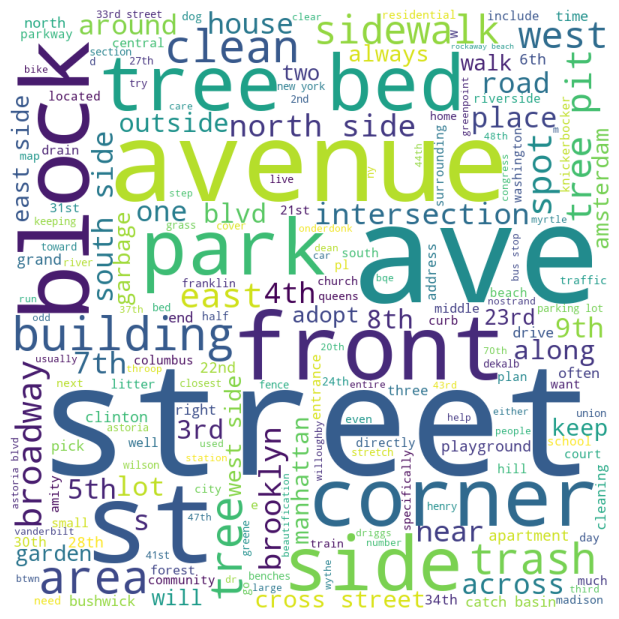

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
    background_color ='white',
    stopwords = set(STOPWORDS),
    min_font_size = 10).generate(" ".join(names))
                     
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

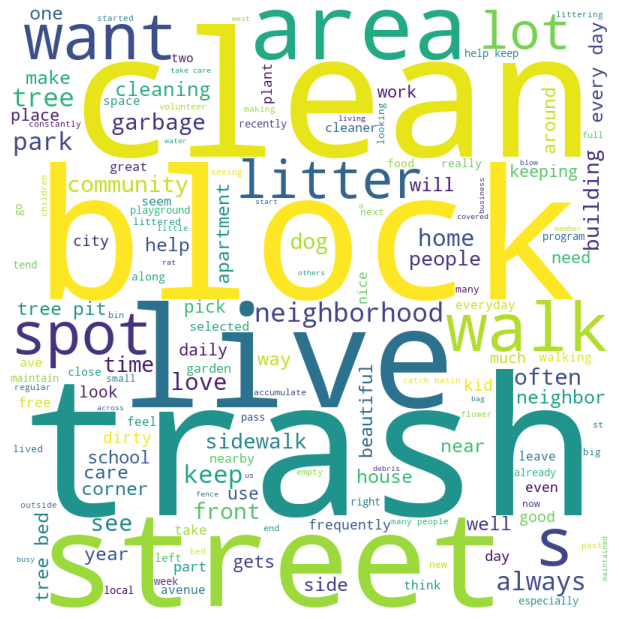

In [5]:
wordcloud = WordCloud(width = 800, height = 800,
    background_color ='white',
    stopwords = set(STOPWORDS),
    min_font_size = 10).generate(" ".join(reasons))
                     
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [6]:
from collections import Counter
import re

stop_words = set(STOPWORDS)
stop_words.remove("i")

def count_bigrams(text, n):
    words = text.split()
    words = [w for w in words if w not in stop_words]
    bigrams = zip(words, words[1:])
    bigrams_list = [" ".join(b) for b in bigrams]
    bigrams_list = [b for b in bigrams_list if "." not in b]
    bigram_counts = Counter(bigrams_list)
    most_common_bigrams = bigram_counts.most_common(n)
    for pair in most_common_bigrams:
        print(pair[0], pair[1])
    return bigram_counts

In [7]:
name_bigrams = count_bigrams(" ".join(names), 25)

tree beds 35
north side 22
tree bed 20
front building 14
south side 13
east side 13
tree pits 12
west side 12
ave & 11
tree pit 11
side street 11
catch basin 8
across street 8
side block 8
cross streets 8
directly front 7
i plan 7
beds front 7
front apartment 7
cross street 7
7th ave 6
i want 6
street broadway 6
tree front 6
5th ave 5


In [8]:
reason_bigrams = count_bigrams(" ".join(reasons), 25)

i live 103
i walk 44
i want 41
i love 27
tree beds 16
i see 15
every day 15
tree pit 15
block i 15
help keep 15
i think 13
walk dog 13
i selected 12
want keep 12
want help 12
keep clean 11
live block 11
take care 10
see trash 10
selected spot 10
many people 10
trash i 9
want make 9
it’s near 8
i pass 8


In [9]:
from datetime import datetime, timedelta

date_format = "%Y-%m-%d %H:%M:%S"
parsed_dates = [datetime.strptime(date, date_format) for date in dates]

nov_1 = datetime.strptime("2024/11/01", "%Y/%m/%d")
nov_10 = datetime.strptime("2024/11/10", "%Y/%m/%d")
nov_20 = datetime.strptime("2024/11/20", "%Y/%m/%d")

recent_dates = [date for date in parsed_dates if nov_10 <= date < nov_20]

print(len(recent_dates))
print(max(recent_dates))

prev_period = [date for date in parsed_dates if nov_1 <= date < nov_10]
print(len(prev_period))

187
2024-11-19 21:38:36
15


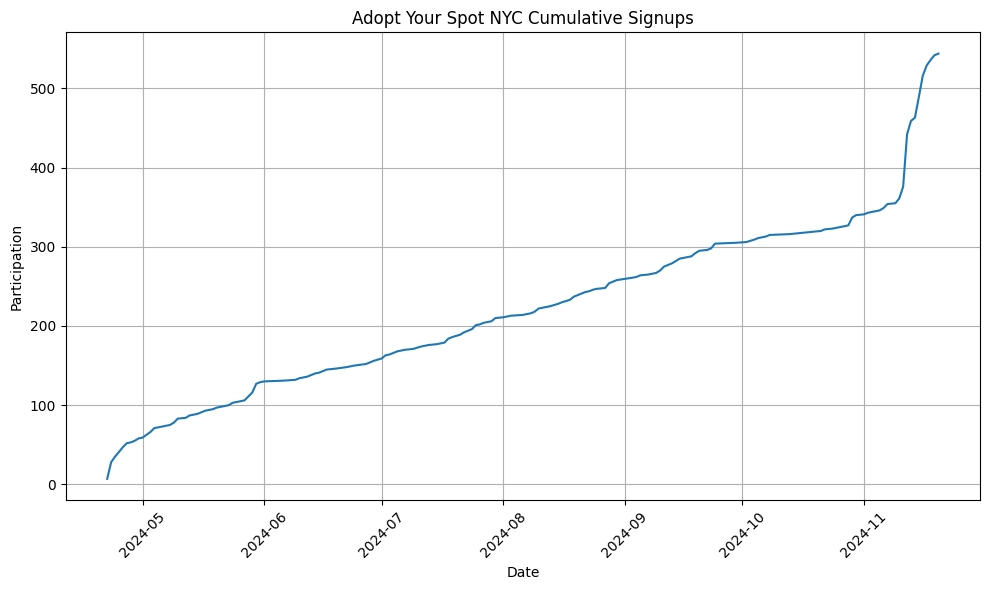

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({"signup_date": parsed_dates})
df["date_only"] = df["signup_date"].dt.date
df = df.groupby("date_only").size().reset_index(name="daily_signups")

df["cumulative_signups"] = df["daily_signups"].cumsum()

plt.figure(figsize=(10, 6))
plt.plot(df["date_only"], df["cumulative_signups"])
plt.title("Adopt Your Spot NYC Cumulative Signups")
plt.xlabel("Date")
plt.ylabel("Participation")
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

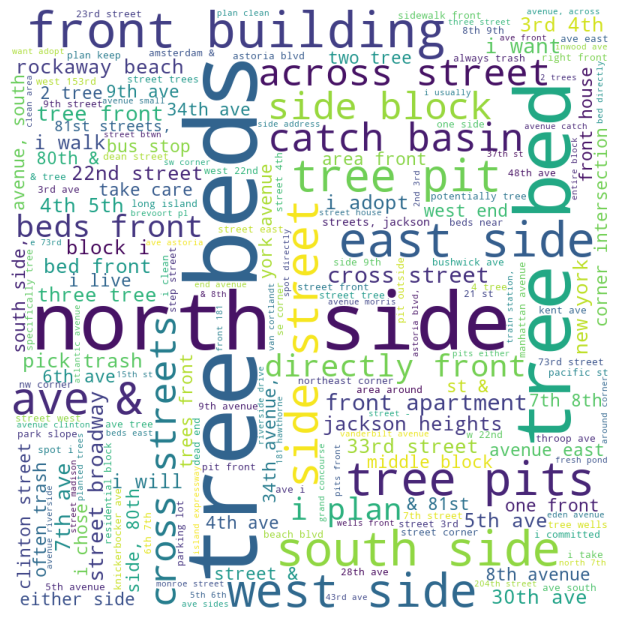

In [11]:
wordcloud = WordCloud(width = 800, height = 800,
    background_color ='white',
    stopwords = stop_words,
    min_font_size = 10).generate_from_frequencies(name_bigrams)
                     
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

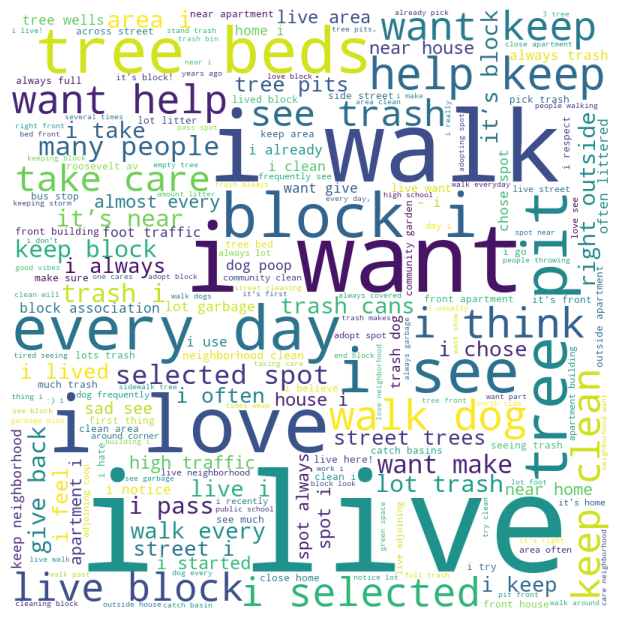

In [12]:
wordcloud = WordCloud(width = 800, height = 800,
    background_color ='white',
    stopwords = stop_words,
    min_font_size = 10).generate_from_frequencies(reason_bigrams)
                     
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

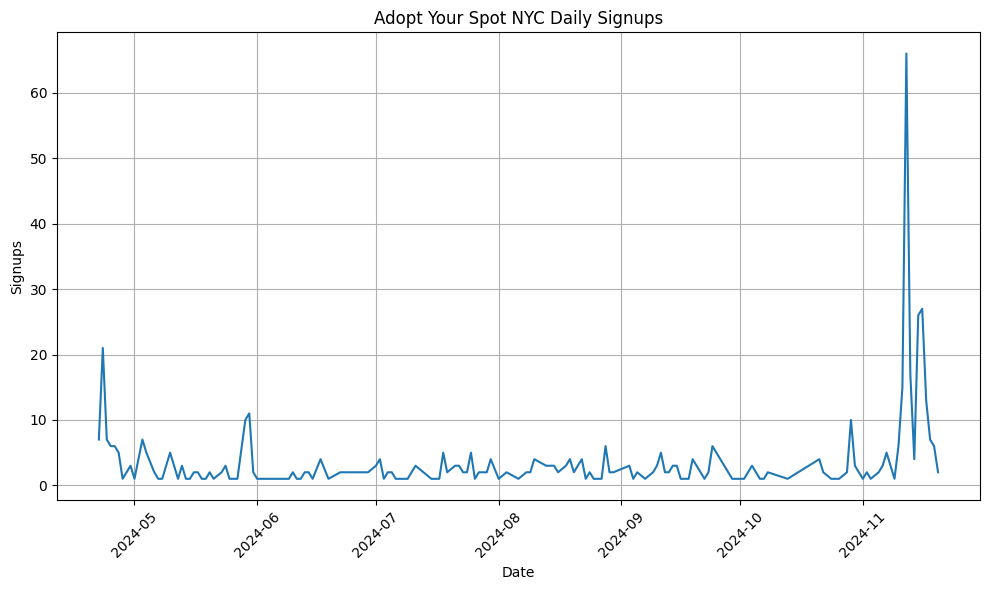

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(df["date_only"], df["daily_signups"])
plt.title("Adopt Your Spot NYC Daily Signups")
plt.xlabel("Date")
plt.ylabel("Signups")
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
def normalize_tokens(text):
    text = text.replace(",", " ")
    text = text.replace(".", " ")
    text = text.replace("/", " ")
    tokens = text.split()
    result = []
    for t in tokens:
        if t.endswith("ss") or t.endswith("us") or t.endswith("es") or t.endswith("os") or t.endswith("as") or t.endswith("is"):
            result.append(t)
        elif t.endswith("s"):
            result.append(t[:-1])
        else:
            result.append(t)
    return result
def search_text(name, corpus, search):
    n = 0
    for text in corpus:
        normalized = normalize_tokens(text)
        for phrase in search:
            if phrase in normalized:
                n += 1
                break
            elif " " in phrase and phrase in text:
                n += 1
                break
    print(name, n, n / len(corpus) * 100)

In [15]:
print("NAMES:")
search_text("tree", names, ["tree", "trees"])
search_text("station", names, ["station", "subway", "train", "bus", "buses", "track", "rail"])
search_text("sidewalk", names, ["sidewalk", "side walk", "path"])
search_text("house", names, ["house", "houses", "home", "homes"])
search_text("apartment", names, ["apartment", "condo", "condos", "building"])
search_text("block", names, ["block"])
search_text("park", names, ["park", "playground"])
search_text("intersection", names, ["intersection", "corner"])
search_text("underpass/overpass", names, ["underpass", "overpass", "bridge", "tunnel"])
search_text("garden", names, ["garden", "flower", "grass", "lawn", "planter"])
search_text("fountain", names, ["fountain"])
search_text("vacant", names, ["abandon","abandoned",  "vacant", "unoccupied", "neglect", "neglected"])
search_text("construction", names, ["construction"])
search_text("drain", names, ["grate", "grates", "drain", "basin", "gutter"])
search_text("shop", names, ["business", "businesses",  "shop", "restaurant", "store", "stores"])
search_text("beach", names, ["beach", "beaches"])
search_text("school", names, ["school", "preschool", "kindergarden"])
search_text("bench", names, ["bench", "benches"])
print("REASONS:")
search_text("live", reasons, ["live"])
search_text("walk", reasons, ["walk", "stroll"])
search_text("run", reasons, ["run", "jog"])
search_text("dog", reasons, ["dog"])
search_text("sunset", reasons, ["sunset"])
search_text("child", reasons, ["child", "children", "kid"])
search_text("wildlife", reasons, ["animal", "wild", "wildlife"])
search_text("play", reasons, ["play"])
search_text("tired", reasons, ["tired", "sick", "frustrated", "frustrating"])
search_text("hope", reasons, ["hope", "wish"])
search_text("every day", reasons, ["every day", "everyday"])
search_text("near", reasons, ["near", "nearby"])
search_text("beautiful", reasons, ["beautiful", "beauty", "pretty"])
search_text("pride", reasons, ["pride", "proud"])
search_text("help", reasons, ["help", "contribute", "contributing"])
search_text("community", reasons, ["community"])
search_text("neighborhood", reasons, ["neighborhood"])
search_text("neglect", reasons, ["abandoned", "abandon", "vacant", "unoccupied", "neglect", "neglected"])
search_text("busy", reasons, ["busy", "traffic"])
search_text("commute", reasons, ["commute", "commuting", "commuter"])
search_text("flood", reasons, ["flood", "flooded", "flooding"])
search_text("family", reasons, ["family", "parent", "relative"])
search_text("care", reasons, ["care"])
search_text("tend", reasons, ["tend", "maintain"])
search_text("rats", reasons, ["rat"])
search_text("environment", reasons, ["environment", "nature", "animal", "wild", "wildlife"])

NAMES:
tree 111 20.40441176470588
station 20 3.6764705882352944
sidewalk 40 7.352941176470589
house 23 4.227941176470589
apartment 53 9.742647058823529
block 69 12.683823529411764
park 68 12.5
intersection 68 12.5
underpass/overpass 7 1.2867647058823528
garden 19 3.4926470588235294
fountain 1 0.1838235294117647
vacant 5 0.9191176470588236
construction 1 0.1838235294117647
drain 25 4.595588235294118
shop 8 1.4705882352941175
beach 7 1.2867647058823528
school 10 1.8382352941176472
bench 5 0.9191176470588236
REASONS:
live 130 23.897058823529413
walk 77 14.154411764705882
run 7 1.2867647058823528
dog 42 7.720588235294118
sunset 3 0.5514705882352942
child 28 5.147058823529411
wildlife 2 0.3676470588235294
play 7 1.2867647058823528
tired 9 1.6544117647058825
hope 5 0.9191176470588236
every day 41 7.536764705882352
near 48 8.823529411764707
beautiful 30 5.514705882352941
pride 7 1.2867647058823528
help 44 8.088235294117647
community 44 8.088235294117647
neighborhood 55 10.11029411764706
negle

In [16]:
def count_words(text, n):
    words = text.split()
    words = [w for w in words if w not in STOPWORDS]
    word_counts = Counter([b for b in words])
    most_common_words = word_counts.most_common(n)
    for word in most_common_words:
        print(word)
    return word

In [17]:
common_name =  count_words(" ".join(names), 25)

('street', 191)
('ave', 156)
('tree', 108)
('side', 103)
('avenue', 88)
('front', 84)
('st', 75)
('&', 61)
('block', 60)
('corner', 56)
('park', 47)
('area', 44)
('west', 44)
('street.', 42)
('east', 41)
('beds', 39)
('trash', 36)
('building', 34)
('st.', 34)
('ave.', 32)
('north', 32)
('clean', 27)
('spot', 25)
('south', 24)
('streets', 24)


In [18]:
common_reason =  count_words(" ".join(reasons), 25)

('trash', 148)
('live', 125)
('block', 118)
('tree', 96)
('clean', 95)
('street', 90)
('area', 85)
('walk', 77)
('want', 75)
('it’s', 72)
('keep', 71)
('always', 61)
('spot', 59)
('see', 53)
('litter', 50)
('lot', 50)
('love', 49)
('front', 45)
('neighborhood', 44)
('people', 44)
('garbage', 43)
('often', 42)
('home', 41)
('park', 40)
('community', 39)
